# Homework4

## Question 1: Data Preparation

#### Preprocess
A matrix with coulumn being student applicants, row being academic departments. <br>
1 denotes that student applied for that department, 0 otherwise. <br>
Filter:
1. departments receive >= 10 applications
2. students apply for > 1 departments

(while)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
student_apply = pd.read_csv('student_admission106.csv', encoding="utf-8", dtype=str)
department = pd.read_csv('univ_name106short1.csv', encoding="utf-8", dtype=str)

student_apply

,school_id,department_id,student_id,student_name,state,location1,location2
0,001,001012,10246842,黃士玹,正1,南部,台南考區
1,001,001012,10042237,黃冠婷,正2,北部,台北考區
2,001,001012,10008031,鍾大方,正3,北部,台北考區
3,001,001012,10201525,曾信豪,正4,中部,彰化考區
4,001,001012,10014615,陳品儒,正5,北部,台北考區
...,...,...,...,...,...,...,...
181262,151,151022,10277940,None,NaN,南部,高雄考區
181263,151,151022,10279214,None,NaN,南部,高雄考區
181264,151,151022,10291919,陳詠舜,NaN,南部,屏東考區
181265,151,151022,10300601,胡昱凡,NaN,東部,花蓮考區


In [25]:
department

,year,school_id,department_id,school_name,department_name,category_id,category_name,school_name_abbr,department_name_abbr
0,106,006,006042,國立政治大學,教育學系,1,教育,政大,教育
1,106,006,006052,國立政治大學,教育學系(公費生),1,教育,政大,教育(公)
2,106,006,006062,國立政治大學,教育學系(原住民公費生),1,教育,政大,教育(原住民)
3,106,006,006022,國立政治大學,歷史學系,2,藝術及人文,政大,歷史
4,106,006,006152,國立政治大學,民族學系,2,藝術及人文,政大,民族學
...,...,...,...,...,...,...,...,...,...
1996,106,099,099212,國立臺北大學,飛鳶組招生,99,其他,臺北,飛鳶組
1997,106,108,108182,慈濟大學,不分系招生(新芽A組),99,其他,慈濟,不分系(新A)
1998,106,108,108192,慈濟大學,不分系招生(新芽B組),99,其他,慈濟,不分系(新B)
1999,106,108,108202,慈濟大學,不分系招生(新芽C組),99,其他,慈濟,不分系(新C)


In [26]:
# uni_student_list = student_apply['student_id'].unique()
# dept_list = student_apply['department_id'].unique()
# student_name_group = student_apply.groupby('student_id')
# department_group = student_apply.groupby('department_id')
print("raw length of the table: %d" % len(student_apply))
constraint_count = 1
while(constraint_count != 0):
    stu_drop_idx = []
    dept_drop_idx = []
    ddrop = []
    studrop = []

    # get the new deparment list and groups after dropping some observations
    department_group = student_apply.groupby('department_id')
    # select department to drop
    for depid, df in department_group:
        if len(df) < 10:
            constraint_count+=1
            ddrop.append(depid)
            for i in range(len(df)):
                dept_drop_idx.append(df.index[i])
    # drop departments with less than 10 applicants
    print("current students:", len(student_apply))
    student_apply = student_apply.drop(dept_drop_idx)
    print("dept to drop:", len(ddrop))
    print("students left:", len(student_apply))

    student_name_group = student_apply.groupby('student_id')
    constraint_count = 0
    # select student to drop
    for stuid, df in student_name_group:
        if len(df) <= 1:
            constraint_count+=1
            studrop.append(stuid)
            for i in range(len(df)):
                stu_drop_idx.append(df.index[i])
    # drop students who apply for less than 2 departments
    student_apply = student_apply.drop(stu_drop_idx)
    print("stu to drop:", len(studrop))
    print("students left:", len(student_apply))
    
print("final length of the table: %d" % len(student_apply))

raw length of the table: 181267
current students: 181267
dept to drop: 45
students left: 181017
stu to drop: 13005
students left: 168012
current students: 168012
dept to drop: 13
students left: 167918
stu to drop: 32
students left: 167886
current students: 167886
dept to drop: 1
students left: 167877
stu to drop: 0
students left: 167877
final length of the table: 167877


In [27]:
df = student_apply[['department_id', 'student_id']].copy()
df2 = pd.crosstab(df.department_id, df.student_id)
df2

student_id,10000101,10000110,10000111,10000112,10000114,10000116,10000120,10000121,10000125,10000126,...,19710702,19710703,19710708,19710709,19770103,19810104,19810201,19810202,19840201,19950101
department_id,,,,,,,,,,,,,,,,,,,,,
001012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Q1.1 
Report the number of academic departments and student applicants in your dataset.

In [28]:
uni_student_list = student_apply['student_id'].unique()
total_application = student_apply['student_id']
dept_list = student_apply['department_id'].unique()
print("There are %d departments, %d student applicants (%d applications) in the dataset." % (len(dept_list), len(uni_student_list), len(total_application)))

There are 1917 departments, 47386 student applicants (167877 applications) in the dataset.


#### Q1.2
Report the top ten departments that received the most applications and the number of applications they received.<br> Identify the department by its department_id and names.

In [29]:
df_rank = df.groupby(['department_id']).count().sort_values(by=['student_id'], ascending=False)
df_rank = df_rank[0:10]
top_ten = df_rank.index
for i in range(len(top_ten)):
    school = department.loc[department['department_id'] == top_ten[i], 'school_name'].iloc[0]
    dept = department.loc[department['department_id'] == top_ten[i], 'department_name'].iloc[0]
    num_of_student = df_rank['student_id'][i]
    print("%d. id: %s name: %s %s number of applications: %d" % (i+1, top_ten[i], school, dept, num_of_student))

1. id: 008122 name: 中原大學 機械工程學系 number of applications: 386
2. id: 012052 name: 中國醫藥大學 藥學系 number of applications: 376
3. id: 046032 name: 銘傳大學 會計學系（臺北校區） number of applications: 367
4. id: 004382 name: 國立成功大學 電機工程學系 number of applications: 357
5. id: 008112 name: 中原大學 土木工程學系 number of applications: 353
6. id: 005192 name: 東吳大學 企業管理學系 number of applications: 353
7. id: 005182 name: 東吳大學 會計學系 number of applications: 351
8. id: 015342 name: 逢甲大學 財務金融學系 number of applications: 340
9. id: 045012 name: 義守大學 電機工程學系 number of applications: 339
10. id: 015222 name: 逢甲大學 資訊工程學系 number of applications: 329


## Question 2: Explore

- color data points according to the academic department's category
- legend or a picture that illustrates the mapping between colors and category names

#### Q2.1
Visualize academic departments using the first eight principal components.<br>
Use your judgment to select multiple pairs of principal components to visualize. <br> 
Discuss the visual patterns with respect to department categories.

In [30]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components = 8)
principle_components = pca.fit_transform(df2)
df_pc = pd.DataFrame(data = principle_components, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

# index df_pc with original department_id
dept_id = df2.index.tolist()
# df_pc.index = dept_id
# df_pc

In [52]:
df_pc['department_id'] = dept_id
df_pca = pd.merge(df_pc, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_pca = df_pca[0:1917]
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,department_id,category_id
0,-0.031522,-0.011273,-0.184654,-0.034955,0.100295,0.008623,-0.096609,-0.061260,001012,2
1,0.196433,-0.009564,-0.248124,-0.061961,0.141711,0.093000,-0.235368,-0.081940,001022,2
2,-0.037099,-0.011608,-0.211391,-0.052809,0.090120,0.031260,-0.101395,-0.064033,001032,2
3,0.004251,-0.018717,-0.168720,-0.048571,0.065928,0.024959,-0.091390,-0.051671,001042,2
4,-0.015203,-0.001161,-0.155715,-0.029216,0.081619,0.005612,-0.079633,-0.046685,001052,2
...,...,...,...,...,...,...,...,...,...,...
1912,-0.076961,-0.006520,-0.116356,-0.059150,0.051446,0.034270,-0.104277,-0.070092,153142,9
1913,-0.087285,-0.011202,-0.132894,-0.070565,-0.045780,-0.038800,-0.054406,-0.077557,153152,9
1914,-0.095655,-0.015953,-0.129989,0.022899,-0.104790,-0.004071,0.036503,-0.086637,153162,9
1915,-0.085798,-0.011753,-0.082805,-0.079688,-0.031998,-0.069660,-0.024883,0.010729,153172,7


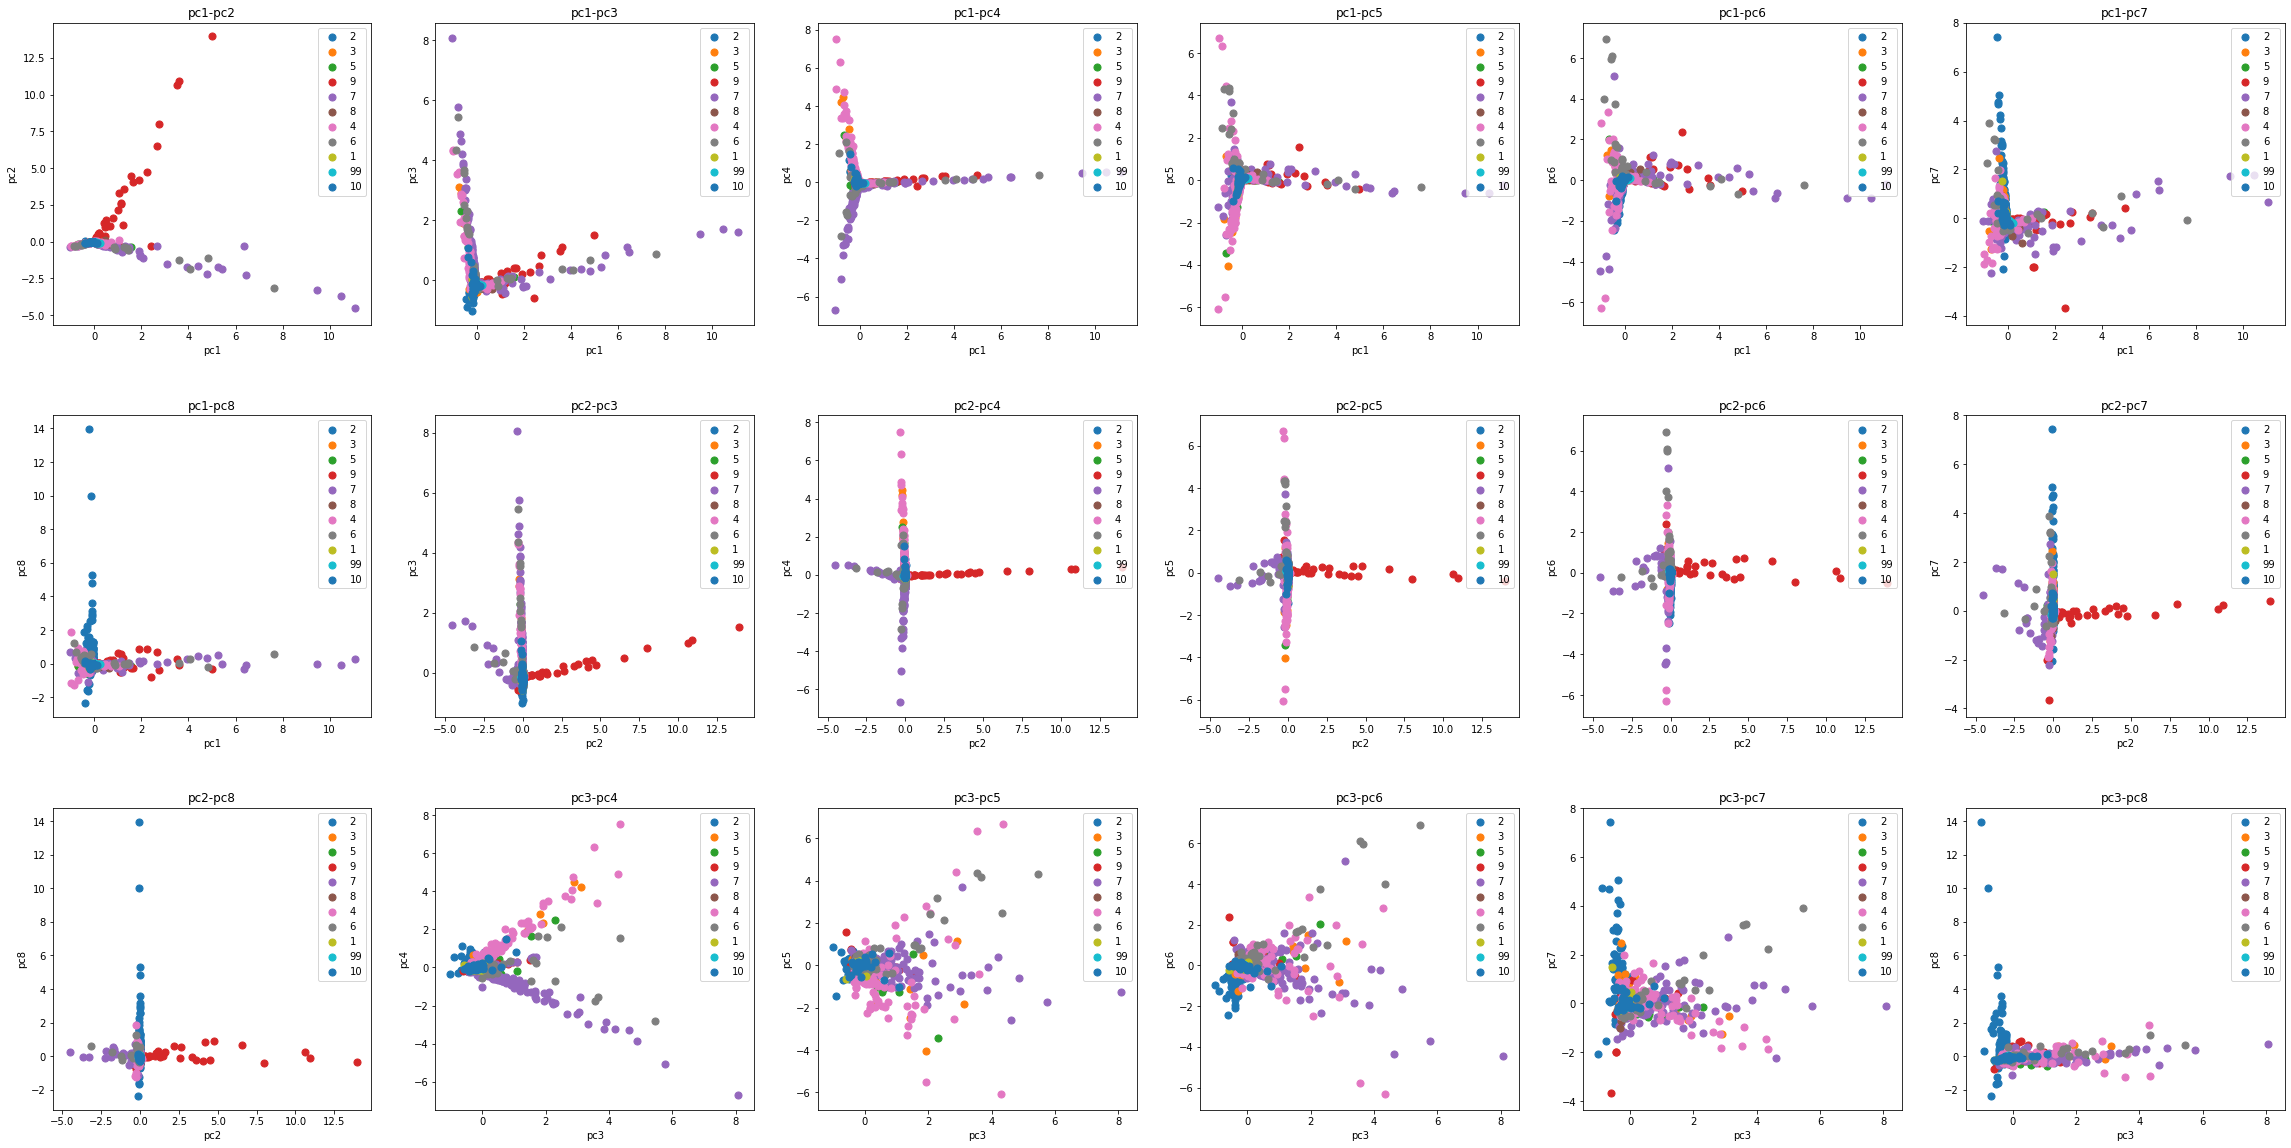

In [82]:
# visualize
list1 = []
list2 = []
for i in range(1,4):
    for j in range(i+1, 9):
        list1.append('pc'+str(i))
        list2.append('pc'+str(j))

fig = plt.figure(figsize = (40,20))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
targets = df_pca['category_id'].unique().tolist()
for i in range(1,19):
    ax = fig.add_subplot(3, 6, i)
    ax.set_xlabel(list1[i-1])
    ax.set_ylabel(list2[i-1])
    ax.set_title(list1[i-1] + '-' + list2[i-1])
    for target in targets:
        index_keep = df_pca['category_id'] == target
        ax.scatter(df_pca.loc[index_keep, list1[i-1]]
                   , df_pca.loc[index_keep, list2[i-1]]
                   , s = 50)
    ax.legend(targets)    

#### Q2.2
Visualize academic departments using multiple dimensional scaling.<br> Consider both the metric and non-metric settings.


In [83]:
from sklearn.manifold import MDS

In [85]:
mds_metric = MDS(n_components = 2)
mds_nonmetric = MDS(n_components = 2, metric = False)

metric = mds_metric.fit_transform(df2)
df_mds = pd.DataFrame(data = metric, columns = ['mds1', 'mds2'])

nonmetric = mds_nonmetric.fit_transform(df2)
df_nonmds = pd.DataFrame(data = nonmetric, columns = ['non_mds1', 'non_mds2'])

In [96]:
df_mds['department_id'] = dept_id
df_mdss = pd.merge(df_mds, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_mdss = df_mdss[0:1917]
df_nonmds['department_id'] = dept_id
df_nonmdss = pd.merge(df_nonmds, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_nonmdss = df_nonmdss[0:1917]

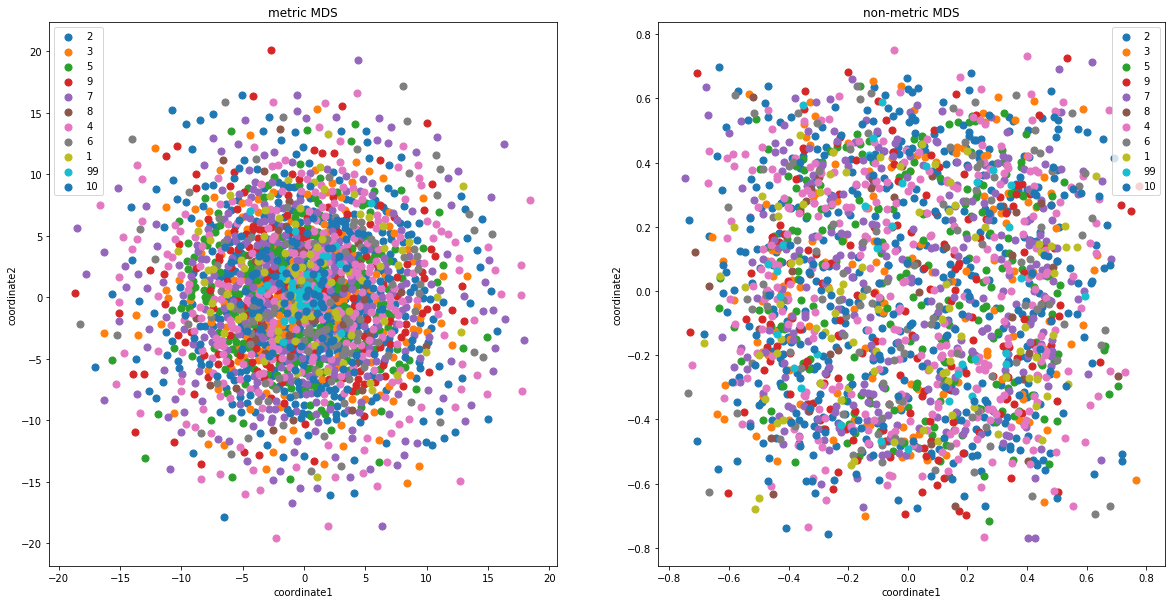

In [98]:
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
   
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('metric MDS')
for target in targets:
    index_keep = df_mdss['category_id'] == target
    ax.scatter(df_mdss.loc[index_keep, 'mds1']
               , df_mdss.loc[index_keep, 'mds2']
               , s = 50)
ax.legend(targets) 

ax = fig.add_subplot(1, 2, 2)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('non-metric MDS')
for target in targets:
    index_keep = df_nonmdss['category_id'] == target
    ax.scatter(df_nonmdss.loc[index_keep, 'non_mds1']
               , df_nonmdss.loc[index_keep, 'non_mds2']
               , s = 50)
ax.legend(targets) 

#### Q2.3
Visualize academic departments using Locally Linear Embedding.

(1) Use 20 neighbors to construct the weight matrix

In [99]:
from sklearn.manifold import LocallyLinearEmbedding

In [101]:
lle_20 = LocallyLinearEmbedding(n_components = 2, n_neighbors = 20)
LLE_20 = lle_20.fit_transform(df2)
LLE_20 = pd.DataFrame(data = LLE_20, columns = ['LLE1', 'LLE2'])

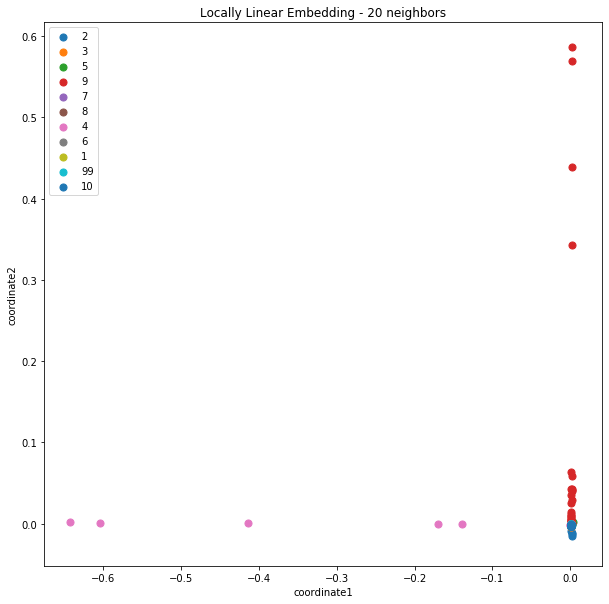

In [106]:
LLE_20['department_id'] = dept_id
df_LLE_20 = pd.merge(LLE_20, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_LLE_20 = df_LLE_20[0:1917]

fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
   
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('Locally Linear Embedding - 20 neighbors')
for target in targets:
    index_keep = df_LLE_20['category_id'] == target
    ax.scatter(df_LLE_20.loc[index_keep, 'LLE1']
               , df_LLE_20.loc[index_keep, 'LLE2']
               , s = 50)
ax.legend(targets) 

(2) Use 40 neighbors to construct the weight matrix

In [107]:
lle_40 = LocallyLinearEmbedding(n_components = 2, n_neighbors = 40)
LLE_40 = lle_40.fit_transform(df2)
LLE_40 = pd.DataFrame(data = LLE_40, columns = ['LLE1', 'LLE2'])

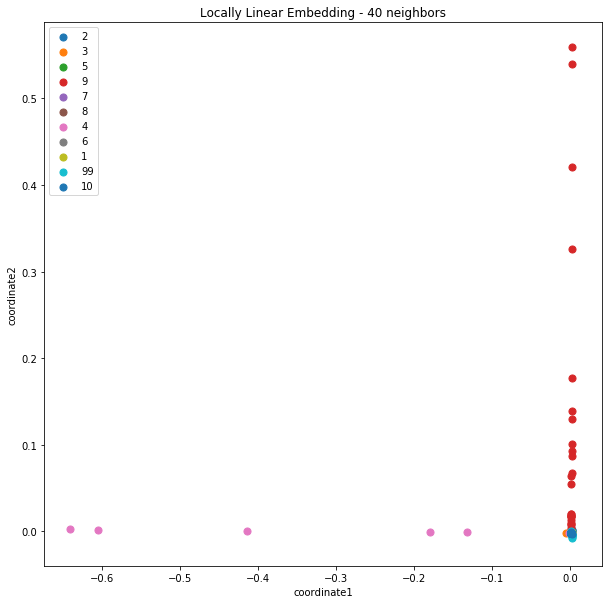

In [110]:
LLE_40['department_id'] = dept_id
df_LLE_40 = pd.merge(LLE_40, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_LLE_40 = df_LLE_40[0:1917]

fig = plt.figure(figsize = (10,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
   
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('Locally Linear Embedding - 40 neighbors')
for target in targets:
    index_keep = df_LLE_40['category_id'] == target
    ax.scatter(df_LLE_40.loc[index_keep, 'LLE1']
               , df_LLE_40.loc[index_keep, 'LLE2']
               , s = 50)
ax.legend(targets) 

 (3) Perform PCA transformation first, and use the first 100 principal components as the input to LLE (with 20 neighbors). 

In [125]:
pca_100 = PCA(n_components = 100)
principle_components_100 = pca_100.fit_transform(df2)
df_pc100 = pd.DataFrame(data = principle_components_100)

pca_LLE = lle_20.fit_transform(df_pc100)
pca_LLE = pd.DataFrame(data = pca_LLE, columns = ['PCA_LLE1', 'PCA_LLE2'])

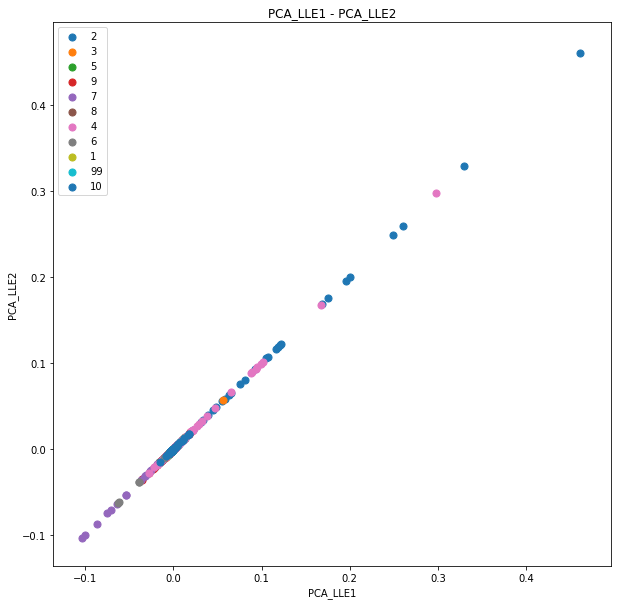

In [126]:
pca_LLE['department_id'] = dept_id
df_pca_LLE = pd.merge(pca_LLE, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_pca_LLE = df_pca_LLE[0:1917]

fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA_LLE1')
ax.set_ylabel('PCA_LLE2')
ax.set_title('PCA_LLE1 - PCA_LLE2')
for target in targets:
    index_keep = df_pca_LLE['category_id'] == target
    ax.scatter(df_pca_LLE.loc[index_keep, 'PCA_LLE1']
               , df_pca_LLE.loc[index_keep, 'PCA_LLE1']
               , s = 50)
ax.legend(targets) 

#### Q2.4
Visualize academic departments using Kernel PCA. <br>At least consider the RBF and Cosine kernel.

In [127]:
from sklearn.decomposition import KernelPCA

In [128]:
kpca_rbf = KernelPCA(n_components = 2, kernel='rbf')
kpca_cosine = KernelPCA(n_components = 2, kernel='cosine')

kpca_rbf_fit = kpca_rbf.fit_transform(df2)
kpca_rbf_fit = pd.DataFrame(data = kpca_rbf_fit, columns = ['kPCA_rbf1', 'kPCA_rbf2'])

kpca_cosine_fit = kpca_cosine.fit_transform(df2)
kpca_cosine_fit = pd.DataFrame(data = kpca_cosine_fit, columns = ['kPCA_cosine1', 'kPCA_cosine2'])

In [141]:
kpca_rbf_fit['department_id'] = dept_id
df_kpca_rbf_fit = pd.merge(kpca_rbf_fit, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_kpca_rbf_fit = df_kpca_rbf_fit[0:1917]
kpca_cosine_fit['department_id'] = dept_id
df_kpca_cosine_fit = pd.merge(kpca_cosine_fit, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_kpca_cosine_fit = df_kpca_cosine_fit[0:1917]

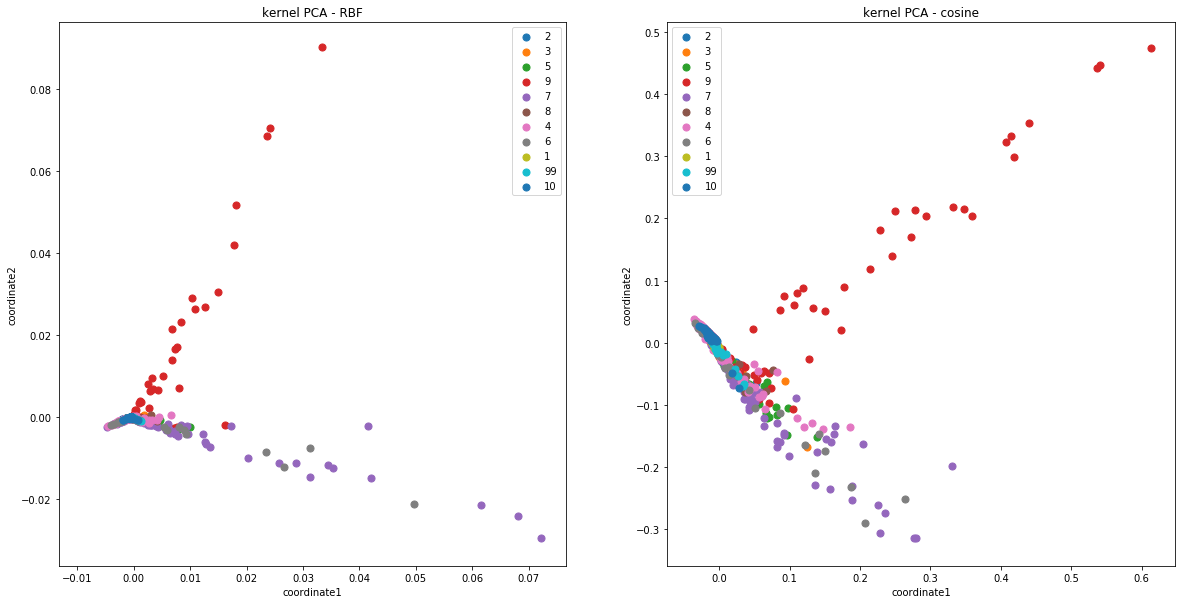

In [142]:
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
   
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('kernel PCA - RBF')
for target in targets:
    index_keep = df_kpca_rbf_fit['category_id'] == target
    ax.scatter(df_kpca_rbf_fit.loc[index_keep, 'kPCA_rbf1']
               , df_kpca_rbf_fit.loc[index_keep, 'kPCA_rbf2']
               , s = 50)
ax.legend(targets) 

ax = fig.add_subplot(1, 2, 2)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('kernel PCA - cosine')
for target in targets:
    index_keep = df_kpca_cosine_fit['category_id'] == target
    ax.scatter(df_kpca_cosine_fit.loc[index_keep, 'kPCA_cosine1']
               , df_kpca_cosine_fit.loc[index_keep, 'kPCA_cosine2']
               , s = 50)
ax.legend(targets)

#### Q2.5 
Visualize academic departments using t-SNE. <br>Consider at least the Euclidian, Cosine, and Jaccard metric. Set numpy random seed so that the results can be repeated.

In [143]:
from sklearn.manifold import TSNE

In [155]:
import random

In [ ]:
random.seed(30)
tsne_euclidian = TSNE(n_components = 2, metric='euclidean')
tsne_cosine = TSNE(n_components = 2, metric='cosine')
tsne_jaccard = TSNE(n_components = 2, metric='jaccard')

tsne_euclidian_fit = tsne_euclidian.fit_transform(df2)
tsne_euclidian_fit = pd.DataFrame(data = tsne_euclidian_fit, columns = ['tsne_euclidian1', 'tsne_euclidian2'])

tsne_cosine_fit = tsne_cosine.fit_transform(df2)
tsne_cosine_fit = pd.DataFrame(data = tsne_cosine_fit, columns = ['tsne_cosine1', 'tsne_cosine2'])

tsne_jaccard_fit = tsne_jaccard.fit_transform(df2)
tsne_jaccard_fit = pd.DataFrame(data = tsne_jaccard_fit, columns = ['tsne_jaccard1', 'tsne_jaccard2'])

In [ ]:
tsne_euclidian_fit['department_id'] = dept_id
df_tsne_euclidian_fit = pd.merge(tsne_euclidian_fit, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_tsne_euclidian_fit = df_tsne_euclidian_fit[0:1917]

tsne_cosine_fit['department_id'] = dept_id
df_tsne_cosine_fit = pd.merge(tsne_cosine_fit, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_tsne_cosine_fit = df_tsne_cosine_fit[0:1917]

tsne_jaccard_fit['department_id'] = dept_id
df_tsne_jaccard_fit = pd.merge(tsne_jaccard_fit, department[['department_id','category_id']], on = 'department_id', how = 'right')
df_tsne_jaccard_fit = df_tsne_jaccard_fit[0:1917]

In [ ]:
fig = plt.figure(figsize = (30,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
   
ax = fig.add_subplot(1, 3, 1)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('tSNE - euclidian')
for target in targets:
    index_keep = df_tsne_euclidian_fit['category_id'] == target
    ax.scatter(df_tsne_euclidian_fit.loc[index_keep, 'tsne_euclidian1']
               , df_tsne_euclidian_fit.loc[index_keep, 'tsne_euclidian2']
               , s = 50)
ax.legend(targets) 

ax = fig.add_subplot(1, 3, 2)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('tSNE - cosine')
for target in targets:
    index_keep = df_tsne_cosine_fit['category_id'] == target
    ax.scatter(df_tsne_cosine_fit.loc[index_keep, 'tsne_cosine1']
               , df_tsne_cosine_fit.loc[index_keep, 'tsne_cosine2']
               , s = 50)
ax.legend(targets)

ax = fig.add_subplot(1, 3, 3)
ax.set_xlabel('coordinate1')
ax.set_ylabel('coordinate2')
ax.set_title('tSNE - jaccard')
for target in targets:
    index_keep = df_tsne_jaccard_fit['category_id'] == target
    ax.scatter(df_tsne_jaccard_fit.loc[index_keep, 'tsne_jaccard1']
               , df_tsne_jaccard_fit.loc[index_keep, 'tsne_jaccard2']
               , s = 50)
ax.legend(targets)

## Question 3: Refine

Select the most promising visualization method in the previous question and refine the result.<br>
- Color points by department category. 
- Label each data point with its name
- Try to reduce the problem caused by overlapping points and labels
- Output an image that is large enough so that a user can easily identify a department and its neighbors
(output the picture to a separate file and submit the file for grading)

In [154]:
final = pd.merge(df_pc, department[['department_id','department_name']], on = 'department_id', how = 'right')
final = final[0:1917]
final

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,department_id,department_name
0,-0.031522,-0.011273,-0.184654,-0.034955,0.100295,0.008623,-0.096609,-0.061260,001012,中國文學系
1,0.196433,-0.009564,-0.248124,-0.061961,0.141711,0.093000,-0.235368,-0.081940,001022,外國語文學系
2,-0.037099,-0.011608,-0.211391,-0.052809,0.090120,0.031260,-0.101395,-0.064033,001032,歷史學系
3,0.004251,-0.018717,-0.168720,-0.048571,0.065928,0.024959,-0.091390,-0.051671,001042,哲學系
4,-0.015203,-0.001161,-0.155715,-0.029216,0.081619,0.005612,-0.079633,-0.046685,001052,人類學系
...,...,...,...,...,...,...,...,...,...,...
1912,-0.076961,-0.006520,-0.116356,-0.059150,0.051446,0.034270,-0.104277,-0.070092,153142,護理學系
1913,-0.087285,-0.011202,-0.132894,-0.070565,-0.045780,-0.038800,-0.054406,-0.077557,153152,長期照護學系
1914,-0.095655,-0.015953,-0.129989,0.022899,-0.104790,-0.004071,0.036503,-0.086637,153162,社會工作學系
1915,-0.085798,-0.011753,-0.082805,-0.079688,-0.031998,-0.069660,-0.024883,0.010729,153172,都市計畫與景觀學系


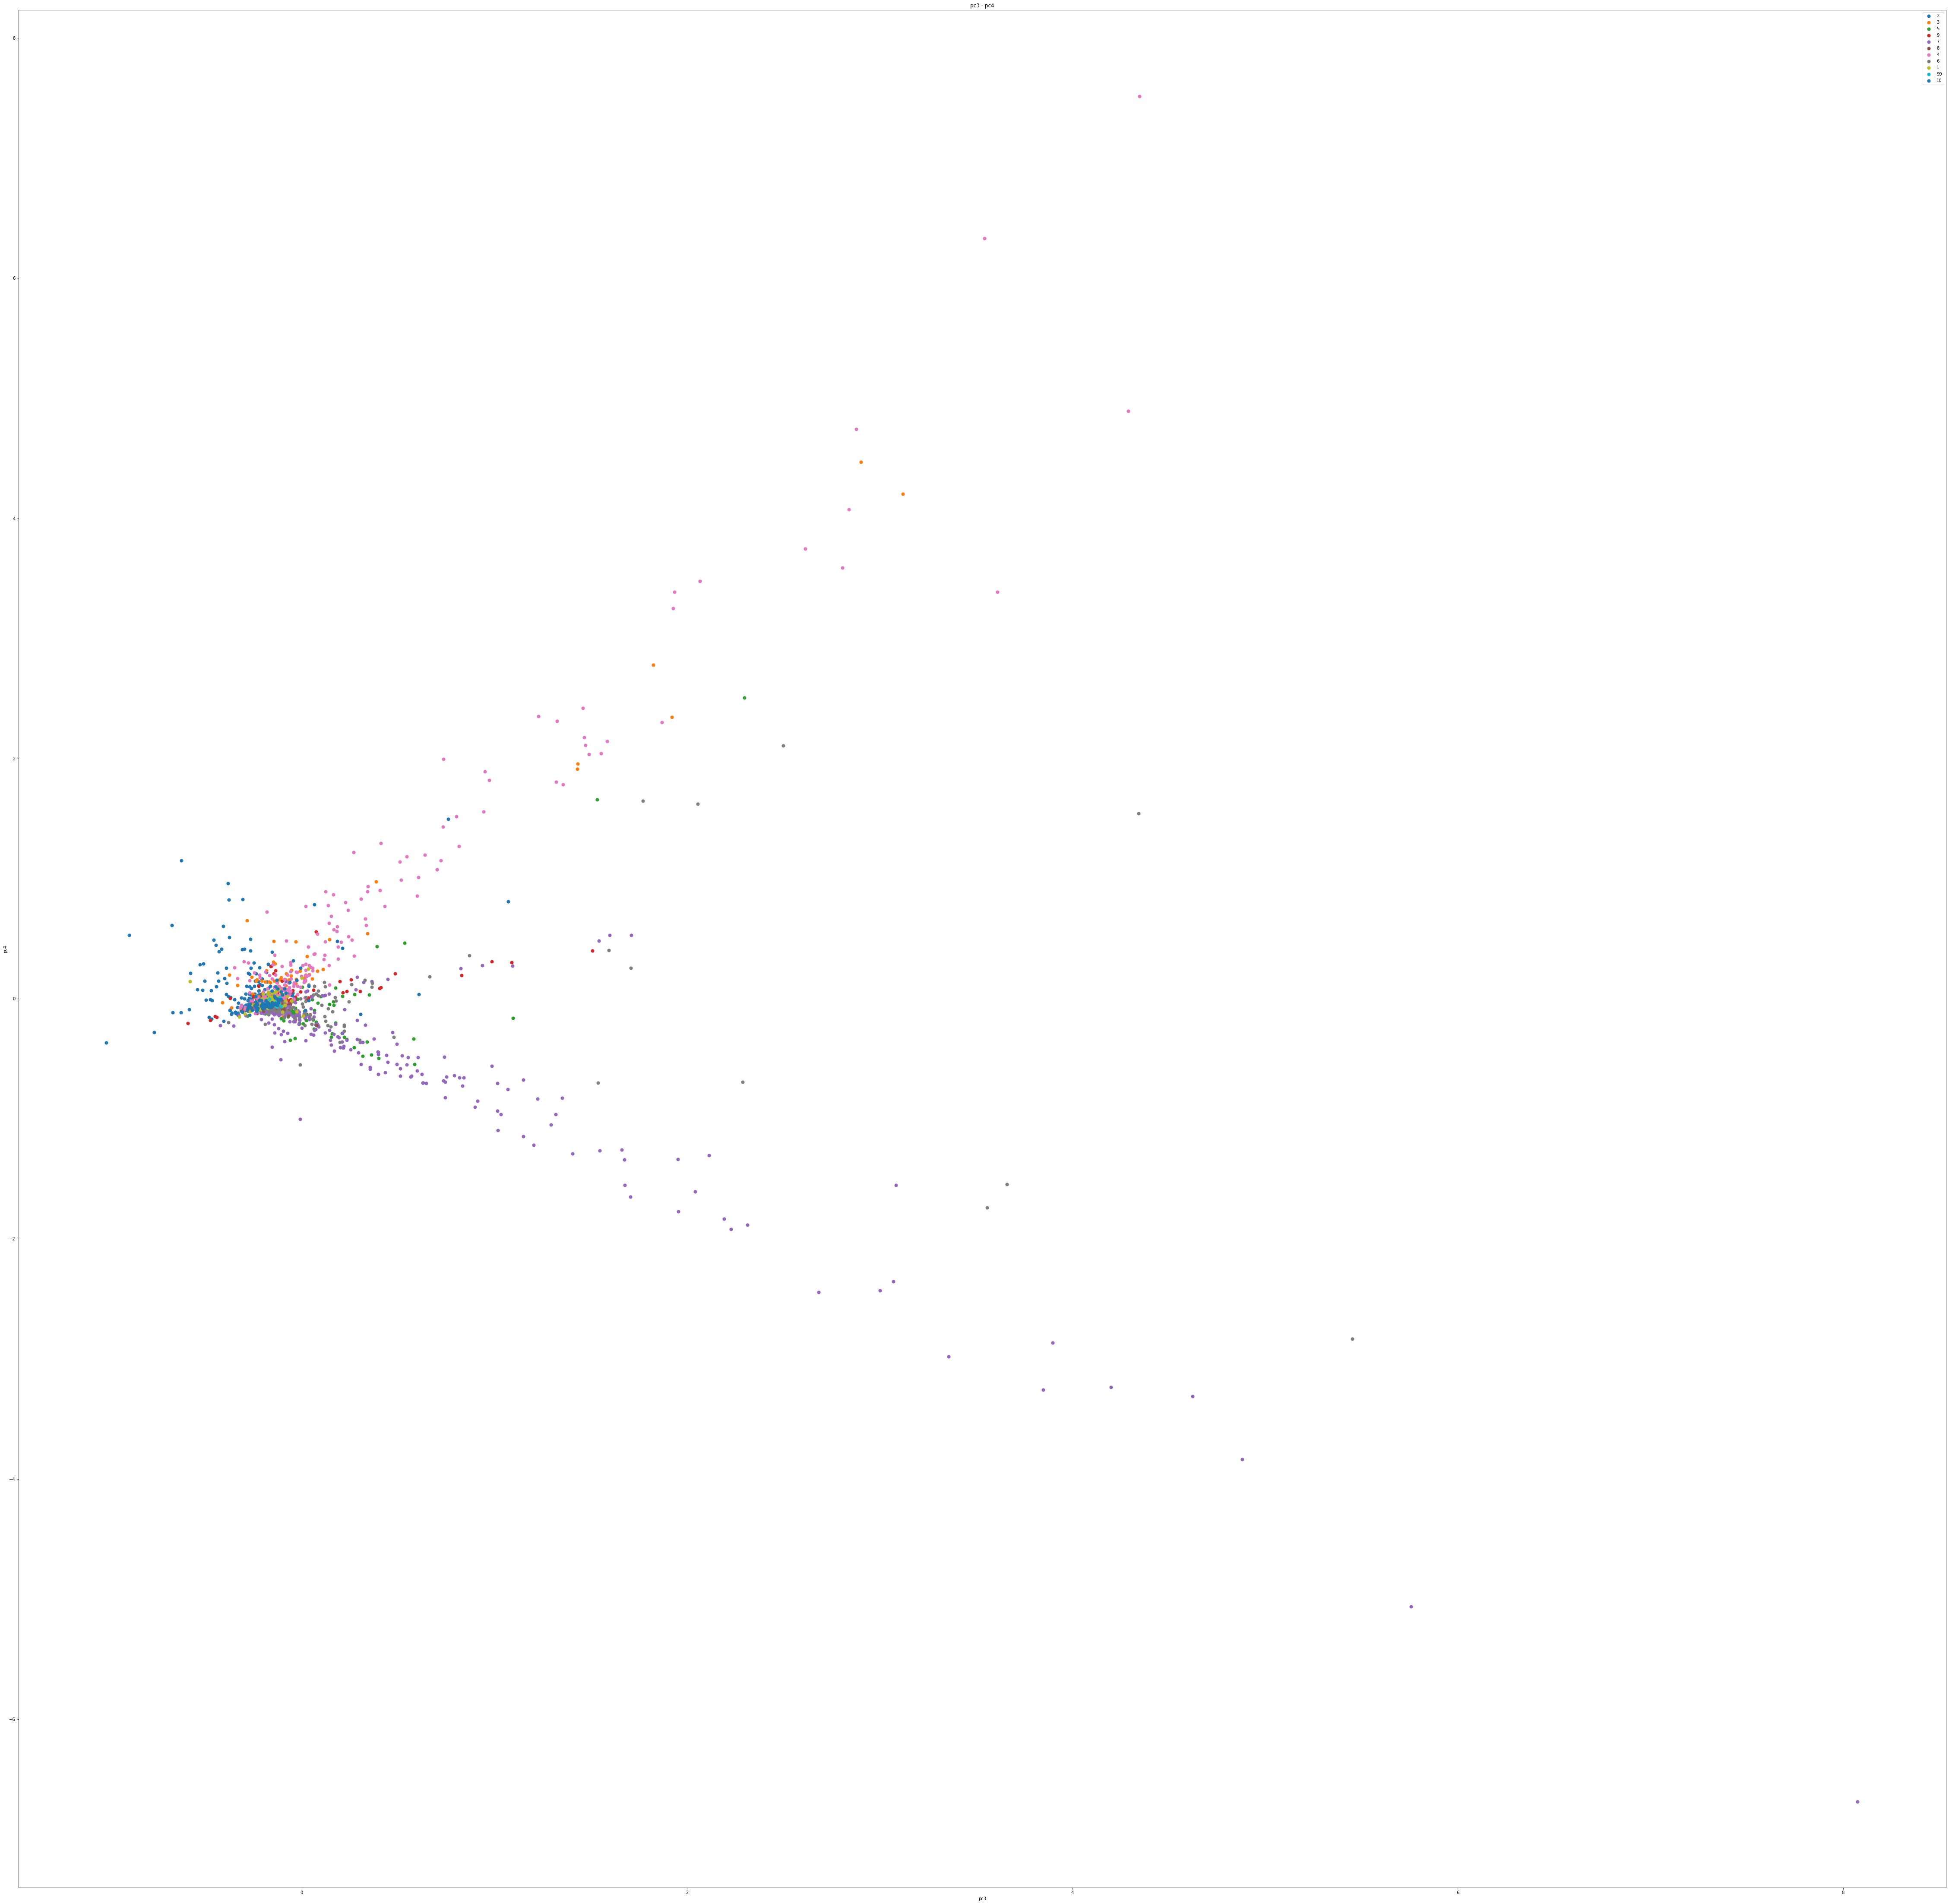

In [153]:
fig = plt.figure(figsize = (80,80))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pc3')
ax.set_ylabel('pc4')
ax.set_title('pc3 - pc4')
for target in targets:
    index_keep = df_pca['category_id'] == target
    ax.scatter(df_pca.loc[index_keep, 'pc3']
               , df_pca.loc[index_keep, 'pc4']
               , s = 50)
ax.legend(targets)
fig.savefig('SL_hw4_graph.png', dpi = 300)